### Pivot_table : ตารางสรุปผลข้อมูลตามเงื่อนไขที่กำหนด

In [1]:
import pandas as pd
%matplotlib inline

In [2]:
df=pd.read_csv('https://github.com/mathawanup/learn_dataset/raw/master/long_format.csv')
df
# long format

,Branch,Menu,Units
0,Bangkok,mocha,365
1,Phuket,mocha,70
2,Pattaya,mocha,350
3,Tak,mocha,450
4,Bangkok,latte,160
5,Phuket,latte,330
6,Pattaya,latte,305
7,Tak,latte,85
8,Bangkok,espresso,435
9,Phuket,espresso,245


In [3]:
df.pivot_table(index='Branch', columns='Menu', values='Units') # wide format

Menu,espresso,latte,mocha
Branch,,,
Bangkok,435,160,365
Pattaya,160,305,350
Phuket,245,330,70
Tak,80,85,450


In [4]:
df.pivot_table(index='Branch', columns='Menu', values='Units', margins=True, margins_name='Total')

Menu,espresso,latte,mocha,Total
Branch,,,,
Bangkok,435,160,365.00,320.000000
Pattaya,160,305,350.00,271.666667
Phuket,245,330,70.00,215.000000
Tak,80,85,450.00,205.000000
Total,230,220,308.75,252.916667


In [5]:
df.pivot_table(index='Branch', columns='Menu', values='Units', margins=True, margins_name='Total', aggfunc='sum') 

Menu,espresso,latte,mocha,Total
Branch,,,,
Bangkok,435,160,365,960
Pattaya,160,305,350,815
Phuket,245,330,70,645
Tak,80,85,450,615
Total,920,880,1235,3035


In [6]:
df.pivot_table()

ValueError: No group keys passed!

## Multi Index

In [7]:
df=pd.read_csv('https://github.com/mathawanup/learn_dataset/raw/master/long_format2.csv')
df

,Branch,Year,Menu,Units
0,Bangkok,2015,mocha,215
1,Phuket,2015,mocha,280
2,Pattaya,2015,mocha,265
3,Tak,2015,mocha,355
4,Bangkok,2016,mocha,480
5,Phuket,2016,mocha,155
6,Pattaya,2016,mocha,225
7,Tak,2016,mocha,425
8,Bangkok,2017,mocha,410
9,Phuket,2017,mocha,175


In [8]:
df2=df.pivot_table(index=['Branch','Year'], columns='Menu', values='Units')
df2

Menu          espresso  latte  mocha
Branch  Year                        
Bangkok 2015       455    390    215
        2016       140    115    480
        2017       190    300    410
Pattaya 2015       355    400    265
        2016       250    435    225
        2017       360    425    140
Phuket  2015       490    475    280
        2016        30    450    155
        2017       380    320    175
Tak     2015       320    340    355
        2016       235    365    425
        2017       135    165    240

In [9]:
df2.groupby('Year').describe()

Menu espresso                                                          latte  \
        count    mean         std    min     25%    50%     75%    max count   
Year                                                                           
2015      4.0  405.00   80.519149  320.0  346.25  405.0  463.75  490.0   4.0   
2016      4.0  163.75  101.601755   30.0  112.50  187.5  238.75  250.0   4.0   
2017      4.0  266.25  122.159390  135.0  176.25  275.0  365.00  380.0   4.0   

Menu          ...                mocha                                     \
        mean  ...     75%    max count    mean         std    min     25%   
Year          ...                                                           
2015  401.25  ...  418.75  475.0   4.0  278.75   57.933151  215.0  252.50   
2016  341.25  ...  438.75  450.0   4.0  321.25  155.851158  155.0  207.50   
2017  302.50  ...  346.25  425.0   4.0  241.25  119.887100  140.0  166.25   

Menu                        
        50%     75%    max  
Year                        
2015  272.5  298.75  355.0  
2016  325.0  438.75  480.0  
2017  207.5  282.50  410.0  

[3 rows x 24 columns]

In [10]:
df2.groupby('Year').describe().T

Year                  2015        2016       2017
Menu                                             
espresso count    4.000000    4.000000    4.00000
         mean   405.000000  163.750000  266.25000
         std     80.519149  101.601755  122.15939
         min    320.000000   30.000000  135.00000
         25%    346.250000  112.500000  176.25000
         50%    405.000000  187.500000  275.00000
         75%    463.750000  238.750000  365.00000
         max    490.000000  250.000000  380.00000
latte    count    4.000000    4.000000    4.00000
         mean   401.250000  341.250000  302.50000
         std     55.733742  155.315539  106.80980
         min    340.000000  115.000000  165.00000
         25%    377.500000  302.500000  266.25000
         50%    395.000000  400.000000  310.00000
         75%    418.750000  438.750000  346.25000
         max    475.000000  450.000000  425.00000
mocha    count    4.000000    4.000000    4.00000
         mean   278.750000  321.250000  241.25000
         std     57.933151  155.851158  119.88710
         min    215.000000  155.000000  140.00000
         25%    252.500000  207.500000  166.25000
         50%    272.500000  325.000000  207.50000
         75%    298.750000  438.750000  282.50000
         max    355.000000  480.000000  410.00000

Year
2015    AxesSubplot(0.125,0.125;0.775x0.755)
2016    AxesSubplot(0.125,0.125;0.775x0.755)
2017    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

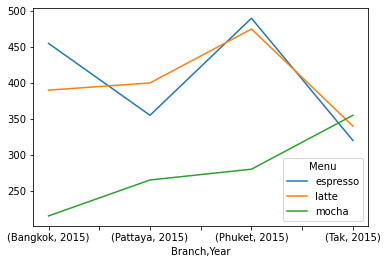

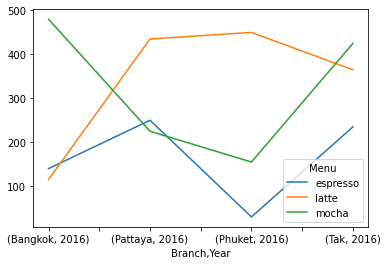

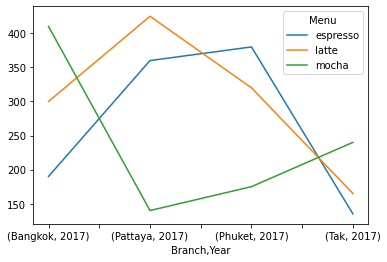

In [11]:
df2.groupby('Year').plot()

In [12]:
df2.groupby('Branch').describe()

Menu    espresso                                                             \
           count        mean         std    min    25%    50%    75%    max   
Branch                                                                        
Bangkok      3.0  261.666667  169.287724  140.0  165.0  190.0  322.5  455.0   
Pattaya      3.0  321.666667   62.115484  250.0  302.5  355.0  357.5  360.0   
Phuket       3.0  300.000000  240.208243   30.0  205.0  380.0  435.0  490.0   
Tak          3.0  230.000000   92.601296  135.0  185.0  235.0  277.5  320.0   

Menu    latte              ...               mocha                          \
        count        mean  ...    75%    max count        mean         std   
Branch                     ...                                               
Bangkok   3.0  268.333333  ...  345.0  390.0   3.0  368.333333  137.325647   
Pattaya   3.0  420.000000  ...  430.0  435.0   3.0  210.000000   63.835727   
Phuket    3.0  415.000000  ...  462.5  475.0   3.0  203.333333   67.144124   
Tak       3.0  290.000000  ...  352.5  365.0   3.0  340.000000   93.407708   

Menu                                        
           min    25%    50%    75%    max  
Branch                                      
Bangkok  215.0  312.5  410.0  445.0  480.0  
Pattaya  140.0  182.5  225.0  245.0  265.0  
Phuket   155.0  165.0  175.0  227.5  280.0  
Tak      240.0  297.5  355.0  390.0  425.0  

[4 rows x 24 columns]

Branch
Bangkok    AxesSubplot(0.125,0.125;0.775x0.755)
Pattaya    AxesSubplot(0.125,0.125;0.775x0.755)
Phuket     AxesSubplot(0.125,0.125;0.775x0.755)
Tak        AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

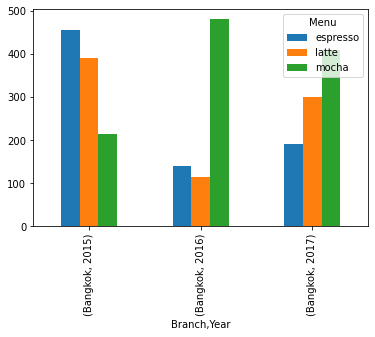

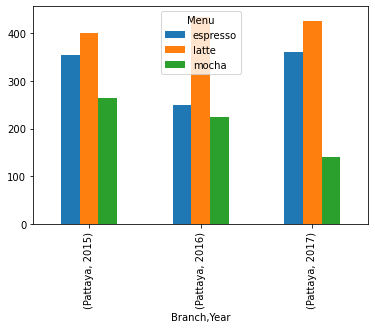

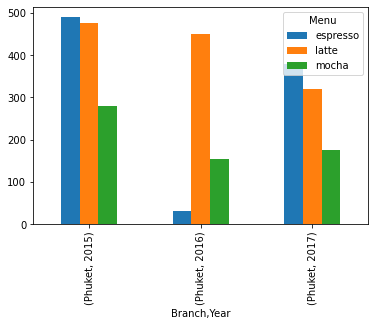

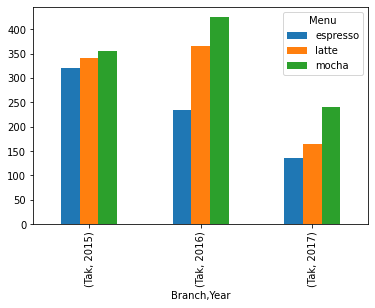

In [13]:
df2.groupby('Branch').plot(kind='bar')

In [14]:
df2=df.pivot_table(index=['Year'], values='Units',margins=True)
df2

,Units
Year,
2015,361.666667
2016,275.416667
2017,270.000000
All,302.361111


In [15]:
df2=df.pivot_table(index=['Year'], values='Units',margins=True, aggfunc='sum')
df2

,Units
Year,
2015,4340
2016,3305
2017,3240
All,10885


In [19]:
df2.groupby('Year')